### Import data

Data: https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
# Import Libraries|
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data from keras built in datasets
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()




Using TensorFlow backend.


In [3]:
# Num iamges, num pixel(32), num pixel(32), color channels(3)
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

### Explore data

Classes(Labels):
- 0 - airplane 
- 1 - automobile 
- 2 - bird 
- 3 - cat 
- 4 - deer 
- 5 - dog 
- 6 - frog 
- 7 - horse
- 8 - ship 
- 9 - truck


[0]


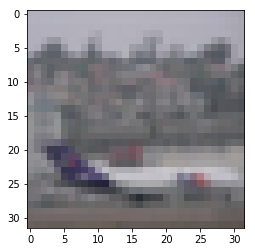

In [7]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\Sage\Anaconda3\envs\cv_tf_gpu\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


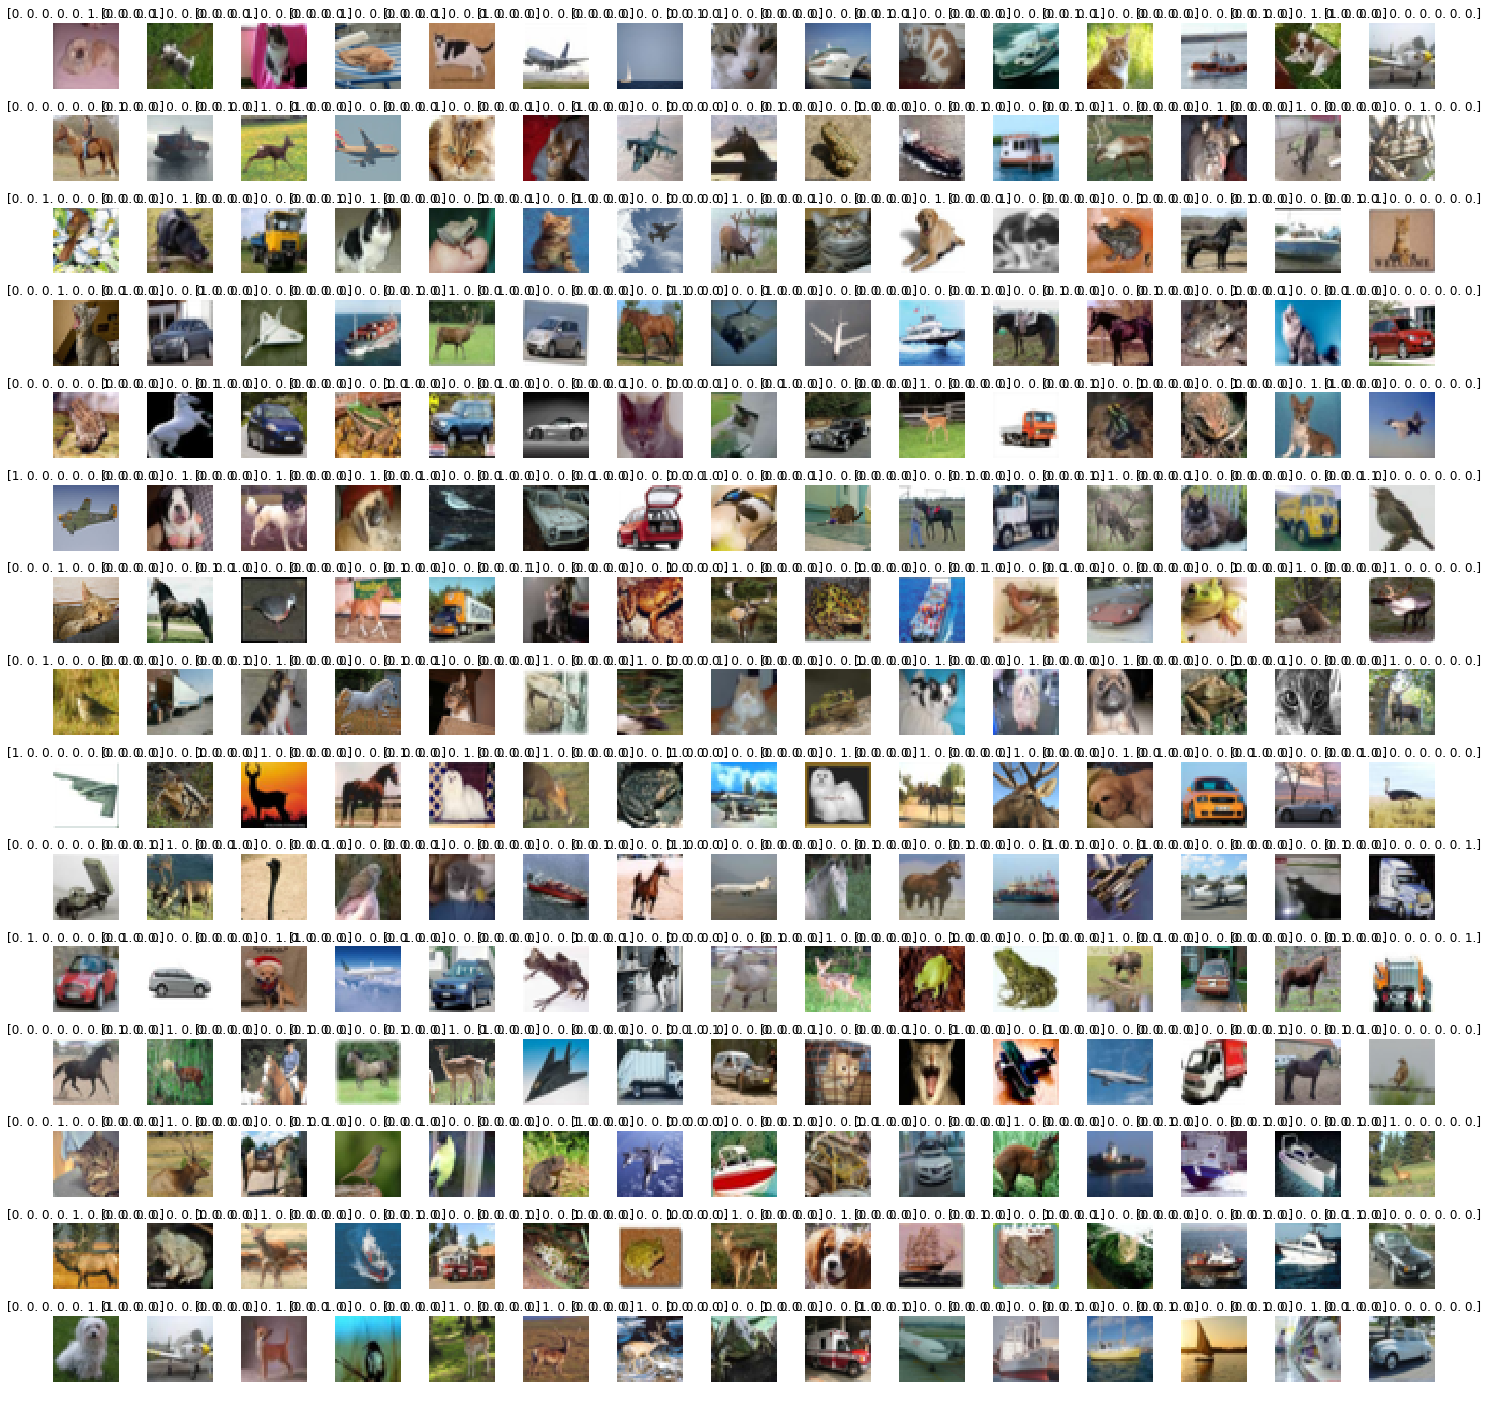

In [37]:
# Create grid for imagesto print out

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
#Flatten
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])
    
plt.subplots_adjust(hspace = 0.4)



In [9]:
n_training

50000

### Data Clean / Prep

In [10]:
# change to float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [11]:
# Number of Categories
number_cat = 10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
# Convert y_train 7 y_test in to binary 

import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)


In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [17]:
# Normalize X. 255 because color values

X_train = X_train / 255
X_test = X_test / 255


In [18]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
input_image_shape = X_train.shape[1:]

In [22]:
input_image_shape

(32, 32, 3)

### Model Training

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
# Create CNN Model

cnn = Sequential()
# First Convolution Layer
cnn.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = input_image_shape))
# Second Convolution Layer
cnn.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
# Add pooling layer
cnn.add(MaxPooling2D(2,2))
# Drop out 30%
cnn.add(Dropout(0.3))


cnn.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
cnn.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))



cnn.add(Flatten())

# Create hidden layers
cnn.add(Dense(units = 512, activation = 'relu'))
cnn.add(Dense(units = 512, activation = 'relu'))


# output layer, 10 classes (neauron). Softmax for 0s & 1s
cnn.add(Dense(units = 10, activation = 'softmax'))



In [25]:
cnn.compile(loss = 'categorical_crossentropy',
            optimizer = keras.optimizers.rmsprop(lr = 0.001),
            metrics = ['accuracy'])

In [26]:
cnn_hist = cnn.fit(X_train, y_train, batch_size=32, epochs=30, shuffle=True)

Epoch 1/30
50000/50000 [==============================] - 15s 303us/step - loss: 1.5746 - acc: 0.4279
Epoch 2/30
50000/50000 [==============================] - 12s 232us/step - loss: 1.1543 - acc: 0.5981
Epoch 3/30
50000/50000 [==============================] - 11s 229us/step - loss: 1.0265 - acc: 0.6501
Epoch 4/30
50000/50000 [==============================] - 11s 230us/step - loss: 0.9823 - acc: 0.6684
Epoch 5/30
50000/50000 [==============================] - 11s 229us/step - loss: 0.9553 - acc: 0.6773
Epoch 6/30
50000/50000 [==============================] - 12s 231us/step - loss: 0.9585 - acc: 0.6801
Epoch 7/30
50000/50000 [==============================] - 12s 230us/step - loss: 0.9459 - acc: 0.6817
Epoch 8/30
50000/50000 [==============================] - 12s 230us/step - loss: 0.9545 - acc: 0.6820
Epoch 9/30
50000/50000 [==============================] - 12s 230us/step - loss: 0.9498 - acc: 0.6841
Epoch 10/30
50000/50000 [==============================] - 12s 234us/step - loss: 

### Evaluate

In [27]:
evaluation = cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 95us/step


In [28]:
print('Test Accuracy: {}'.format(evaluation[1]))

Test Accuracy: 0.6683


In [29]:
pred_classes = cnn.predict_classes(X_test)
pred_classes

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [30]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [31]:
y_test = y_test.argmax(1)

In [32]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

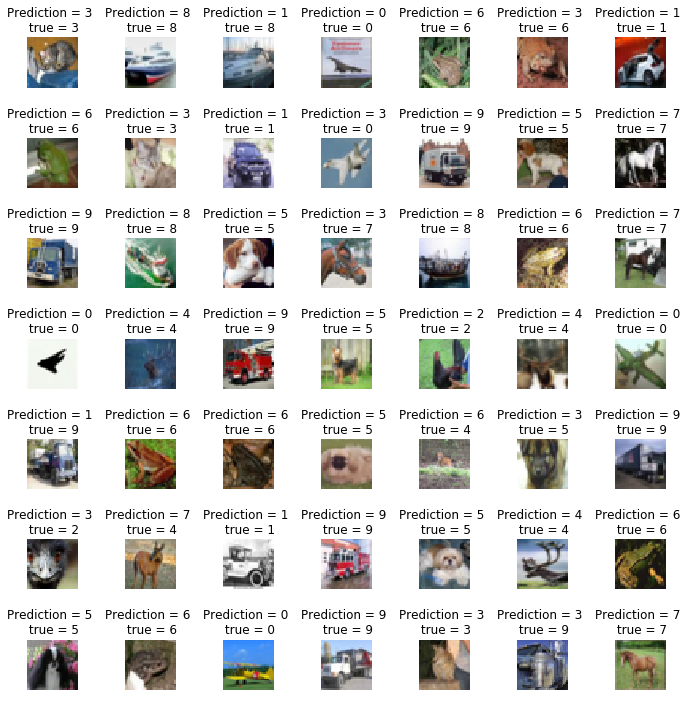

In [42]:
L = 7
W = 7

fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n true = {}'.format(pred_classes[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 1)
    






In [43]:
# confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_classes)



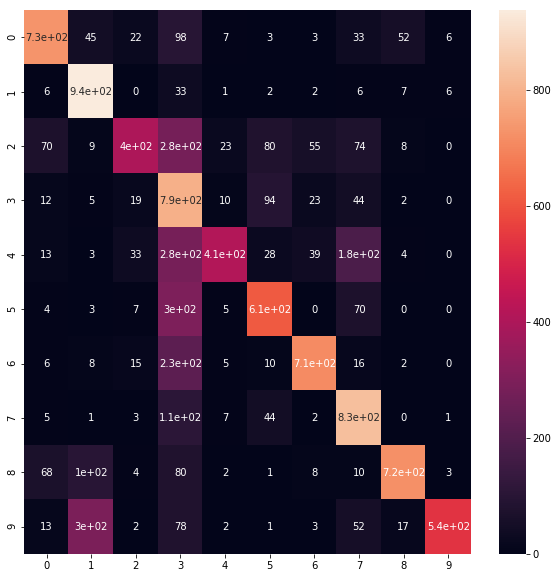

In [47]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# y is prediction
# x is true class

### Save model